In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
x_train = np.random.rand(1000, 2)
y_train = (x_train[:, 0] + x_train[:, 1] > 1).astype(int)  # Simple decision boundary

# Define a simple neural network model
def create_model(optimizer):
    model = keras.Sequential([
        layers.Dense(8, activation='relu', input_shape=(2,)),
        layers.Dense(4, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Compare different optimizers
optimizers = {'SGD': ...,
              'Momentum': ...,
              'RMSprop': ...,
              'Adam': ...}

history_records = {}

for opt_name, opt in optimizers.items():
    print(f"Training with {opt_name} optimizer...")
    model = create_model(opt)
    history = model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)
    history_records[opt_name] = history

# Plot training loss for each optimizer
plt.figure(figsize=(10, 6))
for opt_name, history in history_records.items():
    plt.plot(history.history['loss'], label=opt_name)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparison of Optimizers on Training Loss')
plt.legend()
plt.show()

Training with SGD optimizer...


ValueError: Could not interpret optimizer identifier: Ellipsis

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2458 - accuracy: 0.9274 - val_loss: 0.1280 - val_accuracy: 0.9603
Epoch 2/10
1875/1875 [==============================] - 2s 862us/step - loss: 0.1007 - accuracy: 0.9695 - val_loss: 0.0885 - val_accuracy: 0.9726
Epoch 3/10
1875/1875 [==============================] - 2s 801us/step - loss: 0.0701 - accuracy: 0.9780 - val_loss: 0.0988 - val_accuracy: 0.9690
Epoch 4/10
1875/1875 [==============================] - 1s 768us/step - loss: 0.0525 - accuracy: 0.9833 - val_loss: 0.0785 - val_accuracy: 0.9761
Epoch 5/10
1875/1875 [==============================] - 1s 749us/step - loss: 0.0420 - accuracy: 0.9861 - val_loss: 0.0782 - val_accuracy: 0.9774
Epoch 6/10
1875/1875 [==============================] - 1s 784us/step - loss: 0.0326 - accuracy: 0.9891 - val_loss: 0.0968 - val_accuracy: 0.9728
Epoch 7/10
1875/1875 [==============================] - 1s 777us/step - loss: 0.0280 - accuracy: 0.9909 - val_loss: 0.0771 - v

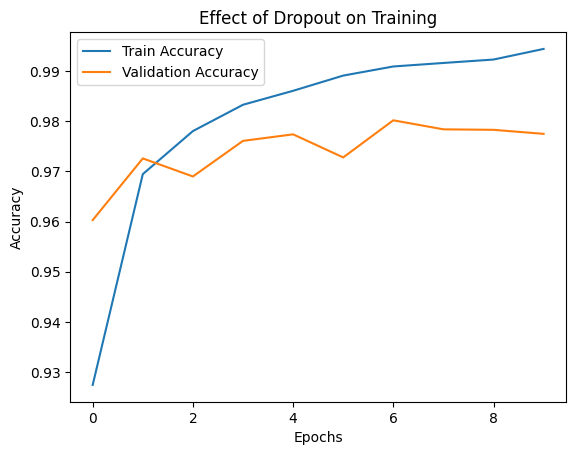

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST dataset (handwritten digits)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten images from 28x28 to 784
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model with Dropout
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    
    layers.Dense(64, activation='relu'),  # Add another hidden layer
    
    layers.Dense(10, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Effect of Dropout on Training')
plt.legend()
plt.show()

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization

In [5]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


170498071/170498071 [==============================] - 65s 0us/step


In [14]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(32,32,3)),
    layers.Dense(64, activation='relu'),  # Add another hidden layer
    layers.Dense(10, activation='softmax')  # Output layer
])


In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5


ValueError: in user code:

    File "/Users/Nicolas/.pyenv/versions/3.8.10/lib/python3.8/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/Users/Nicolas/.pyenv/versions/3.8.10/lib/python3.8/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/Nicolas/.pyenv/versions/3.8.10/lib/python3.8/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/Users/Nicolas/.pyenv/versions/3.8.10/lib/python3.8/site-packages/keras/src/engine/training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/Nicolas/.pyenv/versions/3.8.10/lib/python3.8/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "/Users/Nicolas/.pyenv/versions/3.8.10/lib/python3.8/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/Nicolas/.pyenv/versions/3.8.10/lib/python3.8/site-packages/keras/src/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/Nicolas/.pyenv/versions/3.8.10/lib/python3.8/site-packages/keras/src/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/Nicolas/.pyenv/versions/3.8.10/lib/python3.8/site-packages/keras/src/losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/Nicolas/.pyenv/versions/3.8.10/lib/python3.8/site-packages/keras/src/backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 10) and (None, 32, 32, 10) are incompatible
